In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

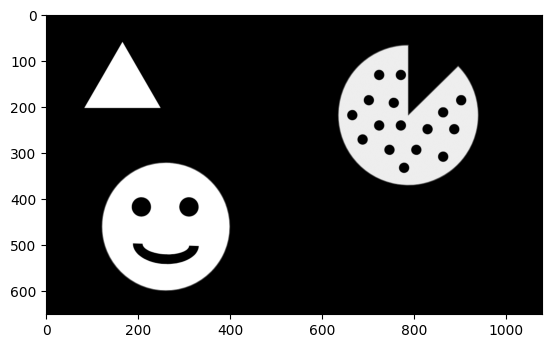

In [2]:
img = cv2.imread("../../resources/DATA/internal_external.png", 0)
plt.imshow(img, cmap='gray')
plt.show()

In [4]:
contours, hierarchy = cv2.findContours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [6]:
type(contours), len(contours), contours[0].shape

(tuple, 22, (392, 1, 2))

In [7]:
type(hierarchy)

numpy.ndarray

In [8]:
hierarchy.shape

(1, 22, 4)

In [11]:
external_contours = np.zeros_like(img)
internal_contours = np.zeros_like(img)
external_contours.shape

(652, 1080)

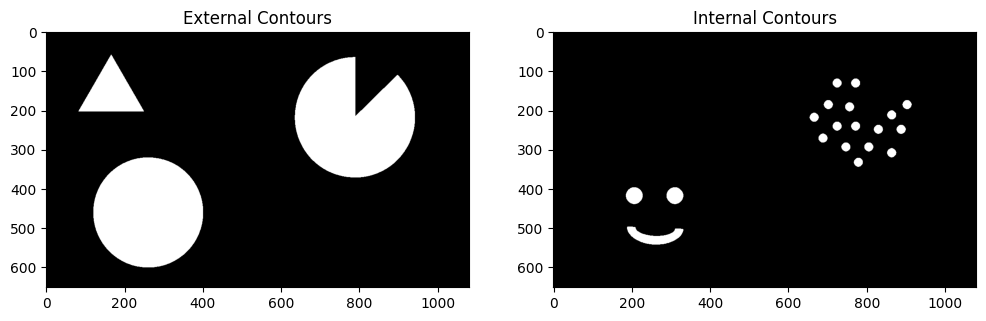

In [13]:
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1: # external
        cv2.drawContours(external_contours, contours, i, 255, -1)
    else: # internal
        cv2.drawContours(internal_contours, contours, i, 255, -1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(external_contours, cmap='gray')
plt.title("External Contours")

plt.subplot(1, 2, 2)
plt.imshow(internal_contours, cmap='gray')
plt.title("Internal Contours")

plt.show()

In [14]:
hierarchy

array([[[ 4, -1,  1, -1],
        [ 2, -1, -1,  0],
        [ 3,  1, -1,  0],
        [-1,  2, -1,  0],
        [21,  0,  5, -1],
        [ 6, -1, -1,  4],
        [ 7,  5, -1,  4],
        [ 8,  6, -1,  4],
        [ 9,  7, -1,  4],
        [10,  8, -1,  4],
        [11,  9, -1,  4],
        [12, 10, -1,  4],
        [13, 11, -1,  4],
        [14, 12, -1,  4],
        [15, 13, -1,  4],
        [16, 14, -1,  4],
        [17, 15, -1,  4],
        [18, 16, -1,  4],
        [19, 17, -1,  4],
        [20, 18, -1,  4],
        [-1, 19, -1,  4],
        [-1,  4, -1, -1]]], dtype=int32)

In [23]:
values, counts = np.unique_counts(hierarchy[..., 3])
dict(zip(values, counts))

{np.int32(-1): np.int64(3),
 np.int32(0): np.int64(3),
 np.int32(4): np.int64(16)}

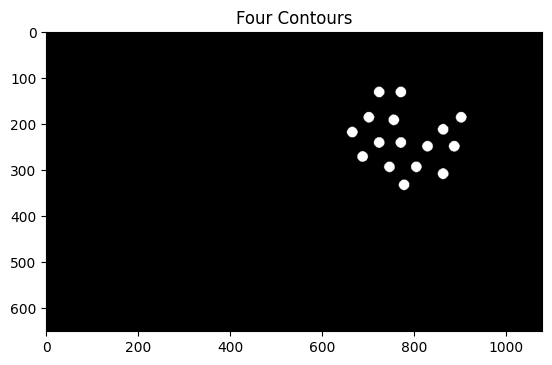

In [15]:
four_contours = np.zeros_like(img)
for i in range(len(contours)):
    if hierarchy[0][i][3] == 4: # only four
        cv2.drawContours(four_contours, contours, i, 255, -1)

plt.imshow(four_contours, cmap='gray')
plt.title("Four Contours")

plt.show()